In [1]:
%pip install numpy pydicom python-gdcm matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
from pathlib import Path

import matplotlib.pyplot as plt
import pydicom
import pydicom.data

In [3]:
base_dir = "./samples/brain-2022/DICOMDIR"
ds = pydicom.dcmread(base_dir)
root_dir = Path(ds.filename).resolve().parent

ds

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 192
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Media Storage Directory Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.276.0.7230010.3.1.4.8323329.4455.1672114280.272695
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.276.0.7230010.3.0.3.6.4
(0002, 0013) Implementation Version Name         SH: 'OFFIS_DCMTK_364'
-------------------------------------------------
(0004, 1130) File-set ID                         CS: 'DCMTK_MEDIA_DEMO'
(0004, 1200) Offset of the First Directory Recor UL: 406
(0004, 1202) Offset of the Last Directory Record UL: 406
(0004, 1212) File-set Consistency Flag           US: 0
(0004, 1220)  Directory Record Sequence  541 item(s) ---- 
   (0004, 1400) Offset of the Next Directory Record UL

In [4]:
for patient in ds.patient_records:
    print(
        f"PATIENT: PatientID={patient.PatientID}, "
        f"PatientName={patient.PatientName}"
    )

    # Find all the STUDY records for the patient
    studies = [
        ii for ii in patient.children if ii.DirectoryRecordType == "STUDY"
    ]
    for study in studies:
        descr = study.StudyDescription or "(no value available)"
        print(
            f"{'  ' * 1}STUDY: StudyID={study.StudyID}, "
            f"StudyDate={study.StudyDate}, StudyDescription={descr}"
        )

        # Find all the SERIES records in the study
        all_series = [
            ii for ii in study.children if ii.DirectoryRecordType == "SERIES"
        ]
        for series in all_series:
            # Find all the IMAGE records in the series
            images = [
                ii for ii in series.children
                if ii.DirectoryRecordType == "IMAGE"
            ]
            plural = ('', 's')[len(images) > 1]

            descr = getattr(
                series, "SeriesDescription", "(no value available)"
            )
            print(
                f"{'  ' * 2}SERIES: SeriesNumber={series.SeriesNumber}, "
                f"Modality={series.Modality}, SeriesDescription={descr} - "
                f"{len(images)} SOP Instance{plural}"
            )

            # Get the absolute file path to each instance
            #   Each IMAGE contains a relative file path to the root directory
            elems = [ii["ReferencedFileID"] for ii in images]
            # Make sure the relative file path is always a list of str
            paths = [[ee.value] if ee.VM == 1 else ee.value for ee in elems]
            paths = [Path(*p) for p in paths]

            # List the instance file paths
            for p in paths:
                
                print(f"{'  ' * 3}IMAGE: Path={os.fspath(p)}")
                
                instance = pydicom.dcmread(Path(root_dir) / p)

                #print()
                #print(f"File path........: {os.fspath(p)}")
                #print(f"SOP Class........: {instance.SOPClassUID} ({instance.SOPClassUID.name})")
                #print()

                pat_name = instance.PatientName
                display_name = pat_name.family_name + ", " + pat_name.given_name
                #print(f"Patient's Name...: {display_name}")
                #print(f"Patient ID.......: {instance.PatientID}")
                #print(f"Modality.........: {instance.Modality}")
                #print(f"Study Date.......: {instance.StudyDate}")
                #print(f"Image size.......: {instance.Rows} x {instance.Columns}")
                #print(f"Pixel Spacing....: {instance.PixelSpacing}")

                # use .get() if not sure the item exists, and want a default value if missing
                #print(f"Slice location...: {instance.get('SliceLocation', '(missing)')}")
                
                continue
                
                try:
                    plt.imshow(instance.pixel_array, cmap=plt.cm.gray)
                    plt.show()
                except:
                    pass

PATIENT: PatientID=NOID, PatientName=NAME^NONE
  STUDY: StudyID=DCMTKSTUDY000000, StudyDate=20220915, StudyDescription=hlava mozek
    SERIES: SeriesNumber=1001, Modality=MR, SeriesDescription=(no value available) - 6 SOP Instances
      IMAGE: Path=DICOM\I0
      IMAGE: Path=DICOM\I1
      IMAGE: Path=DICOM\I2
      IMAGE: Path=DICOM\I3
      IMAGE: Path=DICOM\I4
      IMAGE: Path=DICOM\I5
    SERIES: SeriesNumber=1002, Modality=MR, SeriesDescription=(no value available) - 3 SOP Instances
      IMAGE: Path=DICOM\I6
      IMAGE: Path=DICOM\I7
      IMAGE: Path=DICOM\I8
    SERIES: SeriesNumber=2001, Modality=MR, SeriesDescription=(no value available) - 36 SOP Instances
      IMAGE: Path=DICOM\I9
      IMAGE: Path=DICOM\I10
      IMAGE: Path=DICOM\I11
      IMAGE: Path=DICOM\I12
      IMAGE: Path=DICOM\I13
      IMAGE: Path=DICOM\I14
      IMAGE: Path=DICOM\I15
      IMAGE: Path=DICOM\I16
      IMAGE: Path=DICOM\I17
      IMAGE: Path=DICOM\I18
      IMAGE: Path=DICOM\I19
      IMAGE: Pa

      IMAGE: Path=DICOM\I262
      IMAGE: Path=DICOM\I263
      IMAGE: Path=DICOM\I264
      IMAGE: Path=DICOM\I265
      IMAGE: Path=DICOM\I266
      IMAGE: Path=DICOM\I267
      IMAGE: Path=DICOM\I268
      IMAGE: Path=DICOM\I269
      IMAGE: Path=DICOM\I270
      IMAGE: Path=DICOM\I271
      IMAGE: Path=DICOM\I272
      IMAGE: Path=DICOM\I273
      IMAGE: Path=DICOM\I274
      IMAGE: Path=DICOM\I275
      IMAGE: Path=DICOM\I276
      IMAGE: Path=DICOM\I277
      IMAGE: Path=DICOM\I278
      IMAGE: Path=DICOM\I279
      IMAGE: Path=DICOM\I280
      IMAGE: Path=DICOM\I281
      IMAGE: Path=DICOM\I282
      IMAGE: Path=DICOM\I283
      IMAGE: Path=DICOM\I284
      IMAGE: Path=DICOM\I285
      IMAGE: Path=DICOM\I286
    SERIES: SeriesNumber=9001, Modality=MR, SeriesDescription=(no value available) - 72 SOP Instances
      IMAGE: Path=DICOM\I287
      IMAGE: Path=DICOM\I288
      IMAGE: Path=DICOM\I289
      IMAGE: Path=DICOM\I290
      IMAGE: Path=DICOM\I291
      IMAGE: Path=DICOM\I292

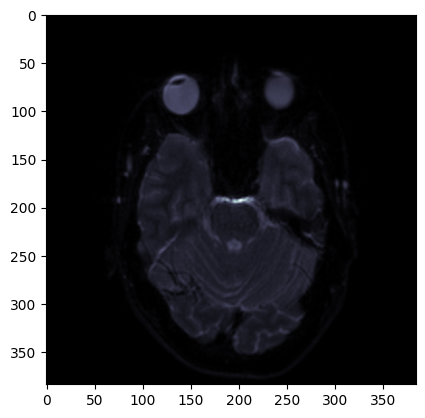

In [5]:
import matplotlib.pyplot as plt
from pydicom import dcmread

filename = "./samples/brain-2022/DICOM/I194"
ds = dcmread(filename)

plt.imshow(ds.pixel_array, cmap=plt.cm.bone)
plt.show()